# Logistic Regression on Non-Linear Data & Hyperparameter Tuning

This document explains **how logistic regression can be extended to non-linear datasets**
using polynomial feature transformation and gives a **clear, mathematical explanation**
of logistic regression hyperparameters.

The focus is correctness, clarity, and real-world usage.

---

## 1. Logistic Regression: Core Assumption

Logistic Regression is a **linear classifier**.

It assumes that the relationship between input features $\mathbf{X}$ and the log-odds
of the output $y$ is linear:

$$
\log\left(\frac{P(y=1 \mid \mathbf{X})}{1 - P(y=1 \mid \mathbf{X})}\right)
= w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
$$

This leads to a **linear decision boundary**.

### Consequence
If the true relationship between features and target is **non-linear**, logistic regression:
- Underfits
- Misclassifies data
- Produces poor accuracy

---

## 2. Why Logistic Regression Fails on Non-Linear Data

Given two input features:

$$
\mathbf{X} = (x_1, x_2)
$$

If the classes are separable only by a **curve** rather than a line, no linear boundary
can separate them.

Hence, vanilla logistic regression fails.

---

## 3. Polynomial Feature Transformation (Key Trick - Arnav Tomar)

Instead of changing the algorithm, we **transform the feature space**.

### Idea
Map original features into a higher-dimensional polynomial space.

For degree $d = 2$:

$$
(x_1, x_2)
\rightarrow
(x_1, x_2, x_1^2, x_2^2, x_1 x_2)
$$

For degree $d = 3$:

$$
(x_1, x_2)
\rightarrow
(x_1, x_2, x_1^2, x_2^2, x_1 x_2,
x_1^3, x_2^3, x_1^2 x_2, x_1 x_2^2)
$$

Logistic regression remains **linear in transformed space**, but becomes
**non-linear in the original space**.

---

## 4. Logistic Regression with Polynomial Features

The model becomes:

$$
\log\left(\frac{P(y=1)}{1 - P(y=1)}\right)
= w_0 + \sum_{j=1}^{m} w_j \phi_j(\mathbf{X})
$$

Where:
- $\phi_j(\mathbf{X})$ are polynomial features
- $m$ increases with polynomial degree

**Important:**  
The target variable $y$ **does not change** — only feature representation does.

---

## 5. Effect of Polynomial Degree

| Degree $d$ | Model Behavior |
|-----------|---------------|
| $d = 1$ | Underfitting |
| $d = 2$ | Partial improvement |
| $d = 3$ | Best bias–variance tradeoff |
| $d \ge 5$ | Overfitting |

### Bias–Variance Tradeoff

- Low degree $\Rightarrow$ high bias
- High degree $\Rightarrow$ high variance

---

## 6. When Polynomial Logistic Regression Is Not Ideal

Polynomial features do **not scale well** when:
- Feature count is high
- Dataset is complex
- Overfitting risk increases

In practice, these models often perform better:
- Decision Trees
- Random Forests
- Support Vector Machines

Polynomial logistic regression is best for:
- Learning concepts
- Small datasets
- Interviews and demonstrations

---

# PART 2: Logistic Regression Hyperparameters

Below are the **important hyperparameters** used in `scikit-learn`.

---

## 7. Regularization (`penalty`)

Regularization controls model complexity.

| Penalty | Mathematical Form |
|-------|------------------|
| `l2` | $\lambda \sum w_i^2$ |
| `l1` | $\lambda \sum |w_i|$ |
| `elasticnet` | L1 + L2 |
| `none` | No regularization |

Default:
$$
\text{penalty} = l2
$$

---

## 8. Regularization Strength ($C$)

$C$ is the **inverse** of regularization strength:

$$
C = \frac{1}{\lambda}
$$

| $C$ Value | Effect |
|---------|-------|
| Small $C$ | Strong regularization |
| Large $C$ | Weak regularization |

---

## 9. Optimization Solver (`solver`)

Solvers define **how weights are optimized**.

| Solver | Supports |
|------|----------|
| `lbfgs` | L2, multinomial |
| `liblinear` | L1, L2 |
| `newton-cg` | L2 |
| `sag` | Large datasets |
| `saga` | L1, L2, ElasticNet |

Recommended default:

$$
\text{solver} = \text{lbfgs}
$$

---

## 10. Class Weight (`class_weight`)

Used for **imbalanced datasets**.

Balanced class weighting:

$$
w_c = \frac{n}{k \cdot n_c}
$$

Where:
- $n$ = total samples
- $n_c$ = samples in class $c$
- $k$ = number of classes

---

## 11. Multi-Class Strategy (`multi_class`)

| Option | Meaning |
|------|--------|
| `ovr` | One-vs-Rest |
| `multinomial` | Softmax |
| `auto` | Automatic selection |

Softmax formulation:

$$
P(y = k \mid \mathbf{X})
= \frac{e^{w_k^T \mathbf{X}}}{\sum_{j} e^{w_j^T \mathbf{X}}}
$$

---

## 12. Maximum Iterations (`max_iter`)

Controls convergence.

If the solver does not converge:

$$
\text{Increase } \text{max\_iter}
$$

Typical values:
$$
100,\; 500,\; 1000
$$

---

## 13. ElasticNet Mixing (`l1\_ratio`)

Used only when:

$$
\text{penalty} = \text{elasticnet}
$$

| $l1\_ratio$ | Behavior |
|------------|---------|
| $0$ | Pure L2 |
| $1$ | Pure L1 |
| $0 < r < 1$ | Mixed |

---

## 14. Recommended Workflow

Start with:

$$
\text{penalty} = l2,\quad
C = 1,\quad
\text{solver} = lbfgs
$$

Then:
1. Tune $C$
2. Handle class imbalance if present
3. Use polynomial features **only if needed**
4. Switch algorithms for strong non-linearity

---

## 15. Final Rule

$$
\text{Feature tricks help — but trees usually win on real non-linear data.}
$$

---

**End of Document**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ushape.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ushape.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ushape.csv')

In [ ]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


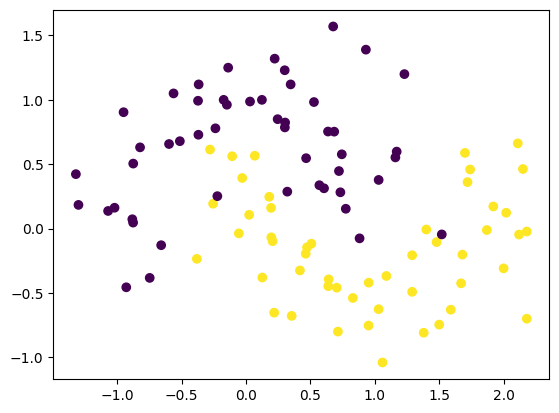

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)


LogisticRegression()

<Axes: >

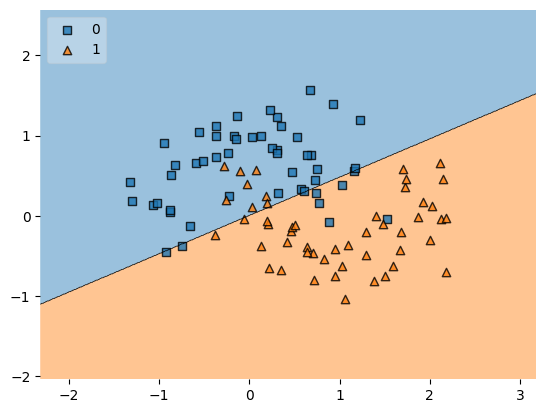

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)


In [ ]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

np.float64(0.9)

In [ ]:
def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

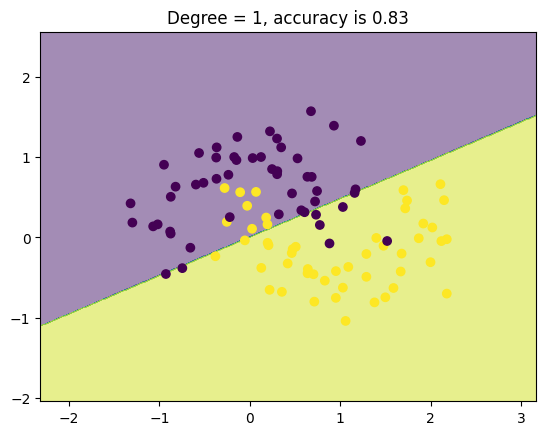

In [ ]:
plot_decision_boundary(X,y)

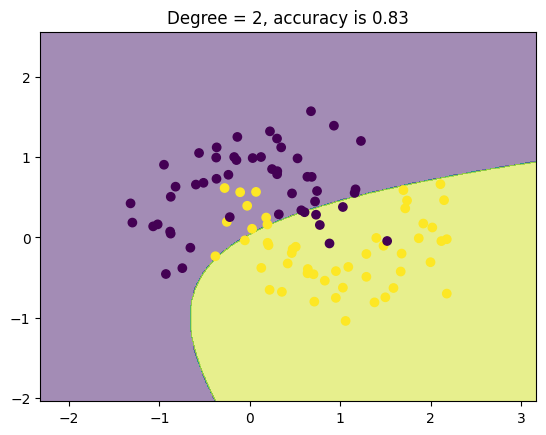

In [ ]:
plot_decision_boundary(X,y,degree=2)

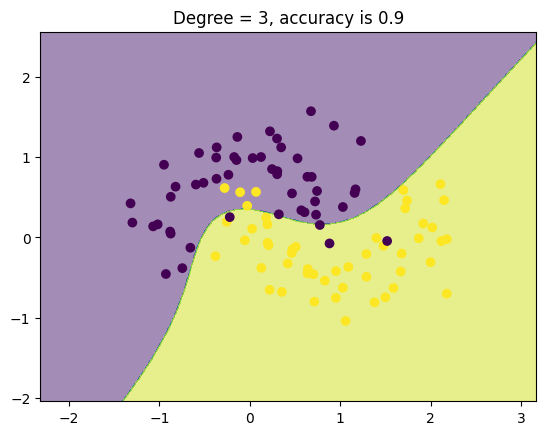

In [ ]:
plot_decision_boundary(X,y,degree=3)

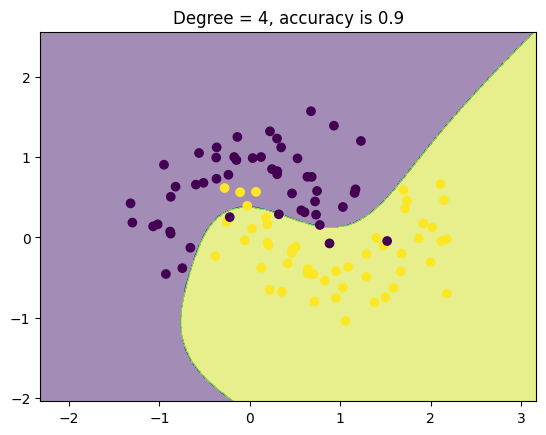

In [ ]:
plot_decision_boundary(X,y,degree=4)

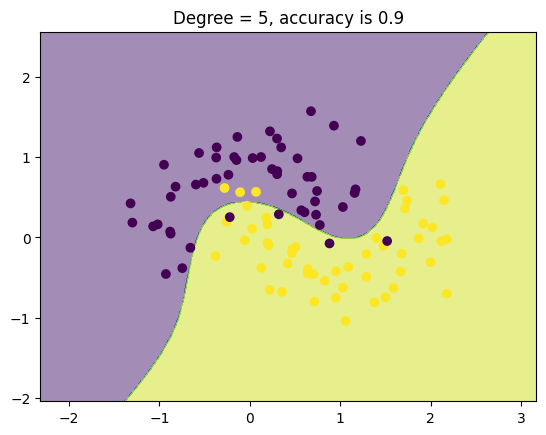

In [ ]:
plot_decision_boundary(X,y,degree=5)

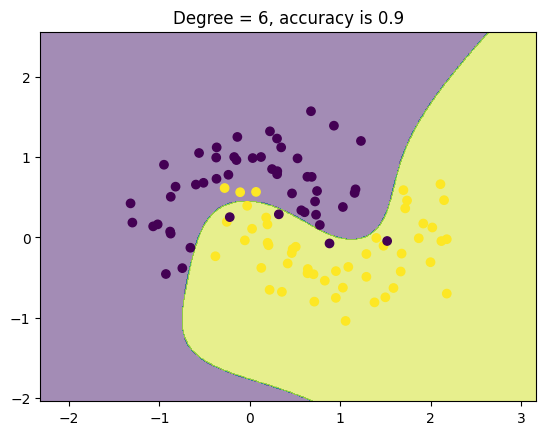

In [ ]:
plot_decision_boundary(X,y,degree=6)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


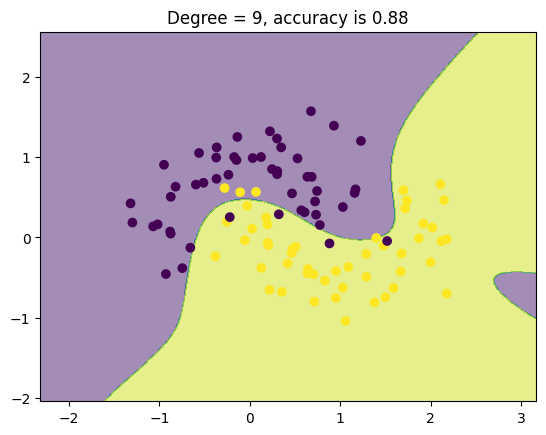

In [ ]:
plot_decision_boundary(X,y,degree=9)